In [1]:
import numpy as np 
import matplotlib.pyplot as plt

# for notebook
# %matplotlib notebook    

# for VS code
%matplotlib inline   

Alcune variabili definite nel primo blocco vengono richiamate anche nei blocchi successivi

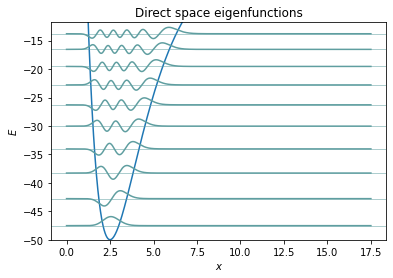

In [2]:
#Eigenvalues in x space 
data = np.loadtxt('../Output/eigenvalues.txt')
idxs = data[:,0]
n_s = 10                        # number of states to show (in both x and k space)
#n_s = len(idxs)                 # uncomment this to show all states
eva_x = data[:,1]
#
# Eigenfunctions in x_space 
data = np.loadtxt('../Output/pot.txt')
x = data[:,0]
V_x = data[:,1]

data = np.loadtxt('../Output/eigenvectors.txt')
waves = data[:,1:]
fig, ax = plt.subplots()
#
_ = ax.set_title('Direct space eigenfunctions')
_ = ax.set_xlabel(r'$x$')
_ = ax.set_ylabel(r'$E$')
y_inf = np.amin(V_x) - 0.02 ; y_sup = eva_x[n_s -1] + 2.0 
_ = ax.set_ylim(y_inf, y_sup)
_ = ax.plot(x, V_x)
ff = ( eva_x[1] - eva_x[0] ) * 0.3
for i in range(n_s):
    _ = ax.axhline(y = eva_x[i], lw=0.5, color='cadetblue')
    _ = ax.plot(x, eva_x[i] + ff*waves[:,i] , color= 'cadetblue')
plt.show()
#fig.savefig('waves_x.png')

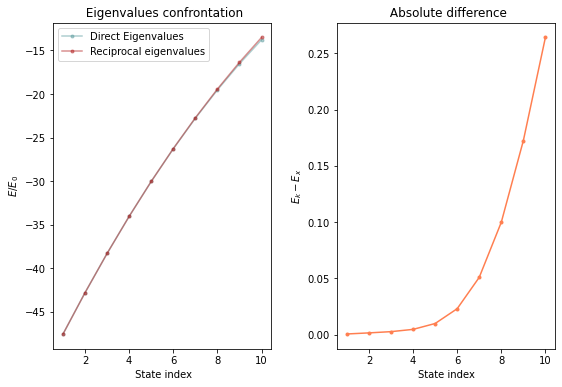

In [3]:
# Eigenvalues comparison 
plt.close('all')
fig, ax = plt.subplots(1,2, figsize=(9,6))
plt.subplots_adjust(wspace=0.3)
data = np.loadtxt('../Output/eigenvalues_k.txt')
eva_k = data[:,1]
_ = ax[0].set_title(' Eigenvalues confrontation')
_ = ax[0].set_xlabel(' State index')
_ = ax[0].set_ylabel(r'$E/E_0$')
_ = ax[0].plot(idxs[:n_s], eva_x[:n_s], marker='.', color='cadetblue', label='Direct Eigenvalues', alpha=0.5)
_ = ax[0].plot(idxs[:n_s], eva_k[:n_s], marker='.', color='firebrick', label='Reciprocal eigenvalues', alpha=0.5)
_ = ax[0].legend()
_ = ax[1].set_title(' Absolute difference')
_ = ax[1].set_ylabel(r'$E_k - E_x$')
_ = ax[1].set_xlabel('State index')
_ = ax[1].plot(idxs[:n_s], (eva_k[:n_s] - eva_x[:n_s] ) , marker='.', color='coral', label='Difference')
plt.show()
#fig.savefig('w_eva_confrontation.png')

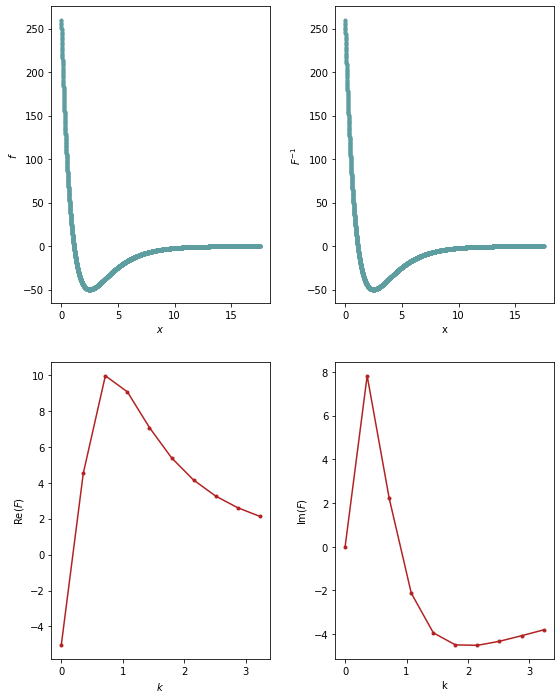

In [4]:
# Fourier transform comparison
plt.close('all')
fig, ax = plt.subplots(2,2, figsize=(9,12))
plt.subplots_adjust(wspace=0.3)
data = np.loadtxt('../Output/fourier.txt')
x = data[:,0]
re_f = data[:,1]
k = data[:,2]
re_F = data[:,3]
im_F = data[:,4]
re_at_f = data[:,5]

#
_ = ax[0,0].set_ylabel(r'$f$')
_ = ax[0,0].set_xlabel(r'$x$')
_ = ax[0,1].set_ylabel(r'$F^{-1}$')
_ = ax[0,1].set_xlabel(r'x')
_ = ax[0,0].plot(x, re_f, marker='.', color='cadetblue')
_ = ax[0,1].plot(x, re_at_f, marker='.', color='cadetblue')
#
_ = ax[1,0].set_ylabel(r'Re$(F)$')
_ = ax[1,0].set_xlabel(r'$k$')
_ = ax[1,1].set_ylabel(r'Im$(F)$')
_ = ax[1,1].set_xlabel(r'k')
_ = ax[1,0].plot(k[:n_s], re_F[:n_s], marker='.', color='firebrick')
_ = ax[1,1].plot(k[:n_s], im_F[:n_s], marker='.', color='firebrick')
#
plt.show()
#fig.savefig('w_four.png')